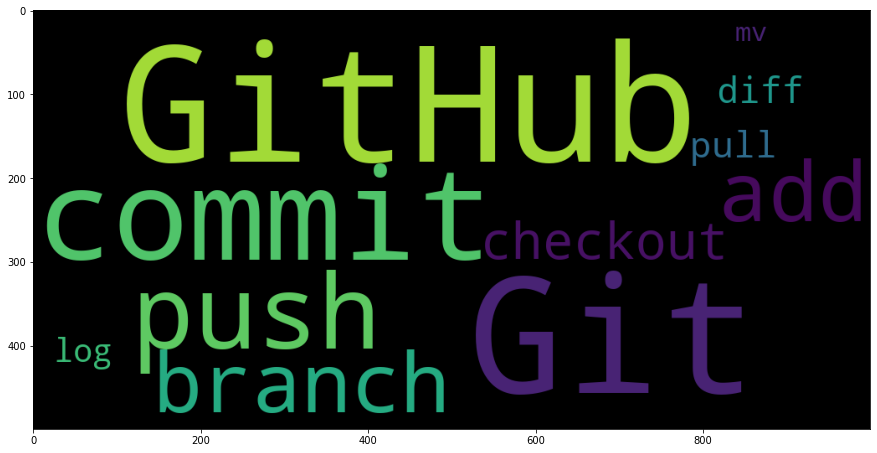

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_could_dict = {'Git':100, 'GitHub':100, 'push':50, 'pull':10, 'commit':80, 'add':30, 'diff':10, 
                  'mv':5, 'log':8, 'branch':30, 'checkout':25}

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imsave('jpw.png', wordcloud)
plt.imshow(wordcloud)



What's your first guess?
is __i__ [1]:green, [2]:yellow or [any key]:grey
is __r__ [1]:green, [2]:yellow or [any key]:grey
is __a__ [1]:green, [2]:yellow or [any key]:grey
is __t__ [1]:green, [2]:yellow or [any key]:grey
is __e__ [1]:green, [2]:yellow or [any key]:grey


What's your second guess?


What's your third guess?


What's your fourth guess?


What's your fifth guess?


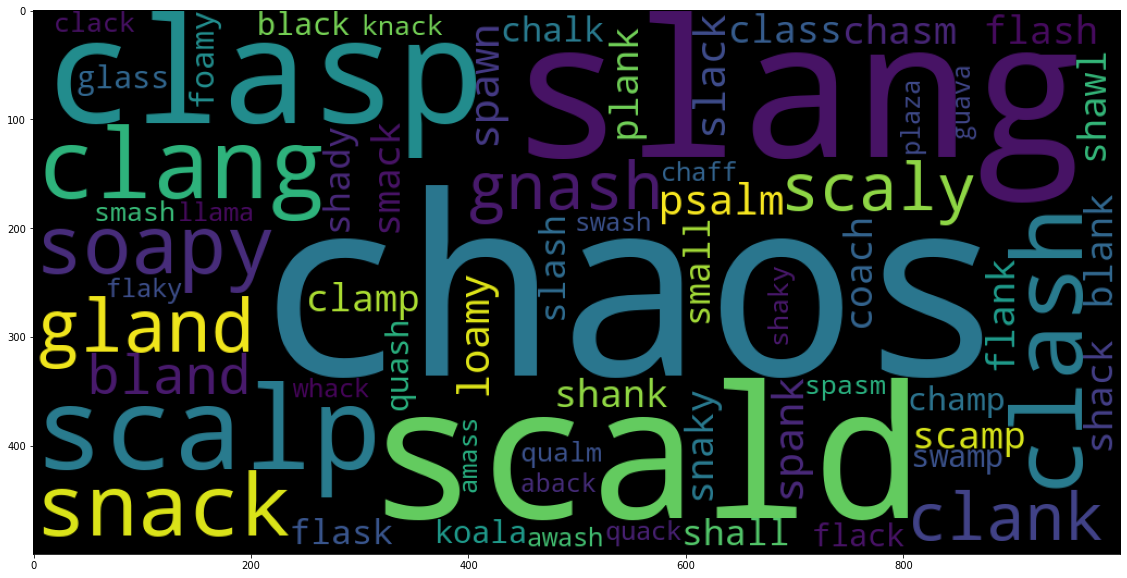

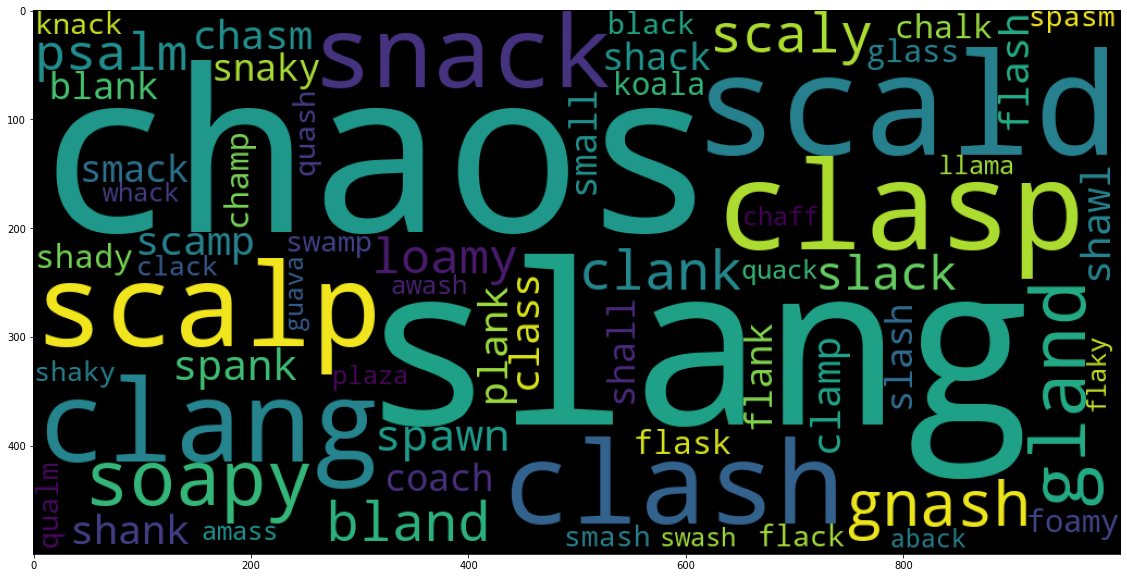

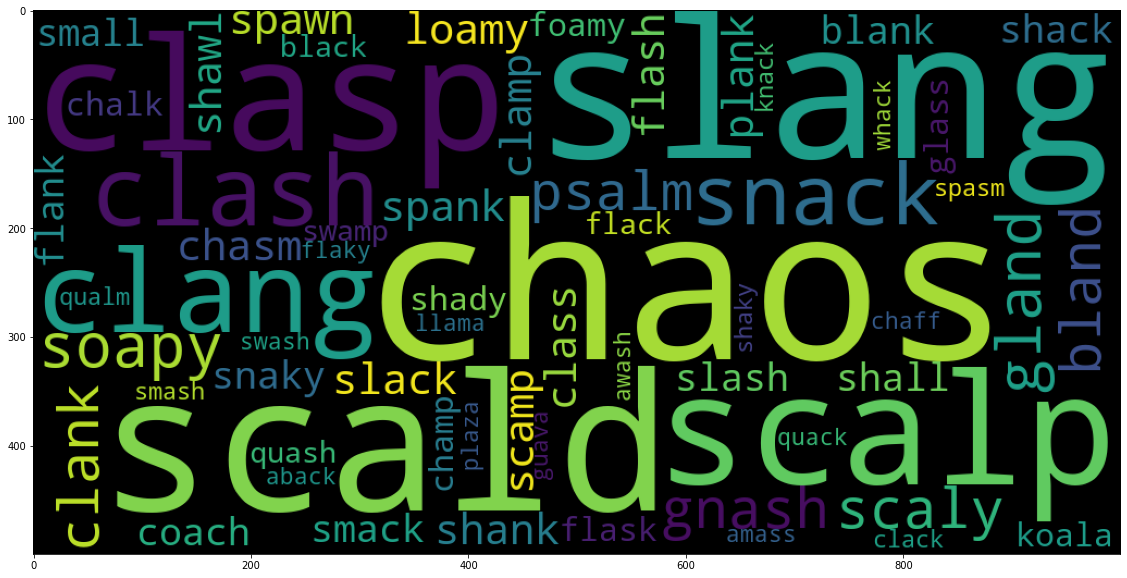

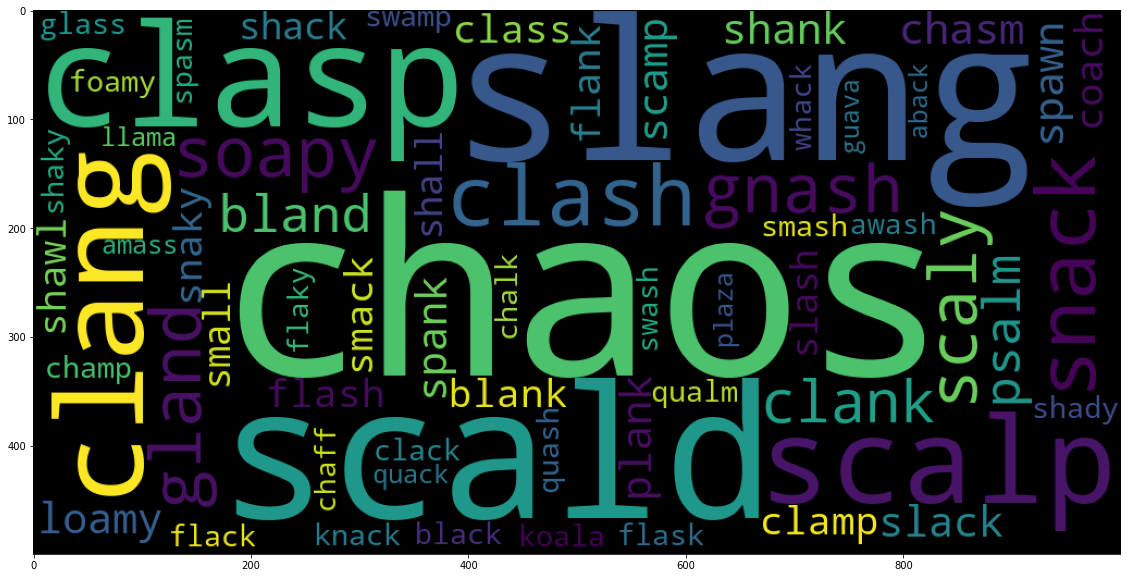

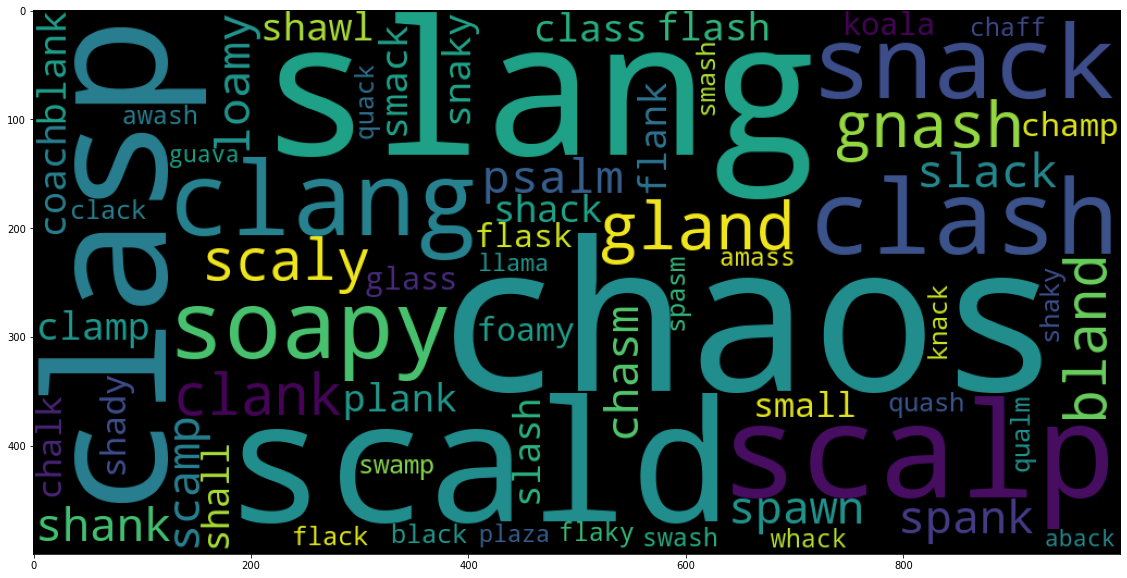

In [1]:
# from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud


import operator
green = ["_ ", "_ ", "_ ", "_ ", "_ "]
yellow = [[], [], [], [], []]
grey = []
possible_words = []


def build_suggestions():
    with open("wordle-official.txt") as all_words:
        global possible_words
        for word in all_words:
            word = word.rstrip("\n")
            possible_words.append(word)
    # return possible_words


def get_guess(number):
    global possible_words
    print(f"\n\nWhat's your {number} guess?")
    guess = input()
    for pos, char in enumerate(guess):
        print(f"is __{char}__ [1]:green, [2]:yellow or [any key]:grey")
        char_col = input()
        if char_col == '1' and char != green[pos]:
            add_green(char, pos)
        elif char_col == '2':
            add_yellow(char, pos)

        else:
            add_grey(char)


def add_grey(char):
    global possible_words, grey
    grey.append(char)
    possible_words = [
        word for word in possible_words if char not in word]
    # print(f"possible: {score_words(possible_words)} ({len(possible_words)})")


def add_green(char, pos):
    global possible_words  # , green
    # green[pos] = char
    possible_words = [
        word for word in possible_words if char == word[pos]]
    # print(f"possible: {score_words(possible_words)} ({len(possible_words)})")
    # print(f"Greens: {green}")


def add_yellow(char, pos):
    global yellow, possible_words
    yellow[pos].append(char)
    possible_words = [
        word for word in possible_words if char in word]
    possible_words = [
        word for word in possible_words if word[pos] not in yellow[pos]]
    # print(f"possible: {score_words(possible_words)} ({len(possible_words)})")
    # print(f"Yellows: {yellow}")


def score_words(possible_words):
    # https://www3.nd.edu/~busiforc/handouts/cryptography/letterfrequencies.html
    frequency = {"e": 56, "a": 43, "r": 38, "i": 38, "o": 36, "t": 35, "n": 33, "s": 29, "l": 27, "c": 23, "u": 18, "d": 17,
                 "p": 16, "m": 15, "h": 15, "g": 12, "b": 10, "f": 9, "y": 9, "w": 6, "k": 5, "v": 5, "x": 1, "z": 1, "j": 1, "q": 1}
    unsorted_d = {}
    for word in possible_words:  # calculate word score based on letter frequency
        score = 0
        counted = ""
        for letter in word:  # do not score duplicated letters
            if letter not in counted:
                score += frequency[letter]
                counted += letter
        # add word and score to dictionary
        unsorted_d[word] = score
    # sort dictionary by values
    sorted_d = dict(sorted(unsorted_d.items(),
                    key=operator.itemgetter(1), reverse=False))
    # f"words {sorted_d.keys()
    scored = f"words: {sorted_d} ({len(sorted_d)} possibilities)"

    # return scored
    return sorted_d


guesses = ["first", "second", "third", "fourth", "fifth"]
build_suggestions()
for count, guess in enumerate(guesses):
    # wordcloud
    get_guess(guess)
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(score_words(possible_words))
    plt.figure(figsize=(20,10))
    # plt.imsave(f"{guess}.png", wordcloud)
    wordcloud.to_file(f"img_{count + 1}.png")
    plt.imshow(wordcloud)

    
